# Human Emotion Detection

In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv("../dataset/fer2013.csv")

In [3]:
dataset.head(10)

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
5,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...,Training
6,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training
7,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training
8,3,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training
9,2,255 254 255 254 254 179 122 107 95 124 149 150...,Training


In [4]:
dataset["Usage"].value_counts()

Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64

## Visualization of Data

(0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral)


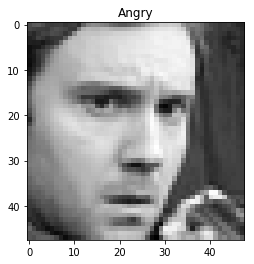

In [5]:
EMOTIONS = [
  'Angry',
  'Disgust',
  'Fear',
  'Happy',
  'Sad',
  'Surprise',
  'Neutral',
]

img = dataset["pixels"][0] # first image
val = img.split(" ")
x_pixels = np.array(val, 'float32')
x_pixels /= 255
x_reshaped = x_pixels.reshape(48,48)
plt.imshow(x_reshaped,cmap= "gray",interpolation="nearest")
emtn = dataset["emotion"][0] 
plt.title(EMOTIONS[emtn])
print("(0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral)")

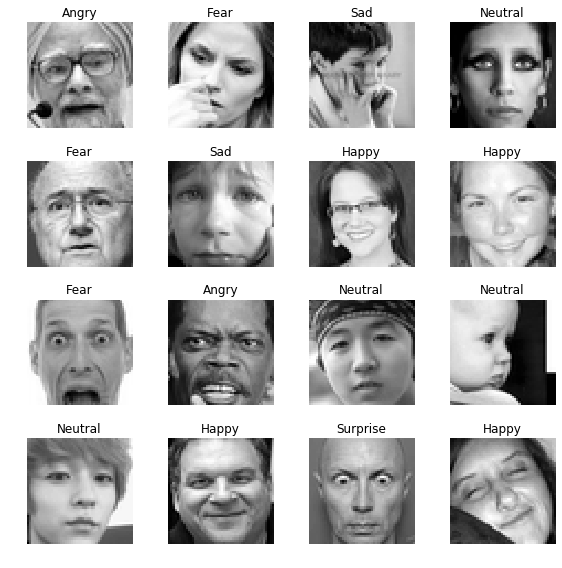

In [6]:
plt.figure(figsize=(8, 8))
for i in range(1,17):
    
    img = dataset["pixels"][i] # first image
    val = img.split(" ")
    x_pixels = np.array(val, 'float32')
    x_pixels /= 255
    x_reshaped = x_pixels.reshape(48,48)
    
    plt.subplot(4,4,i)
    plt.gca().axis('off')
    plt.imshow(x_reshaped,cmap= "gray",interpolation="nearest")
    emtn = dataset["emotion"][i] 
    plt.title(EMOTIONS[emtn])

plt.tight_layout(h_pad=0.01)
plt.show()

## Data reading

In [7]:
#Reading data from csv file

def read_faces_data(reader_file):
    
    row = next(reader_file)
    
    X_train_list, y_train_list = [], []
    X_test_list, y_test_list = [], []
    X_val_list, y_val_list = [], []
    
    N_train, N_test, N_val = 0, 0, 0
    
    N_train, N_test, N_val = 0, 0, 0
    
    for row in reader_file:
        
        emotion, pixels, usage = row
        y = int(emotion)
        
        X_row_strs = pixels.split(' ')
        X_row = [float(x) for x in X_row_strs]
        
        if usage == 'PublicTest':
            y_test_list.append(y)
            X_test_list.append(X_row)
            N_test += 1
            
        elif usage == 'PrivateTest':
            y_val_list.append(y)
            X_val_list.append(X_row)
            N_val += 1
            
        else:
            y_train_list.append(y)
            X_train_list.append(X_row)
            N_train += 1
            
            
    X_test = np.asarray(X_test_list).astype('float64').reshape((N_test, 48, 48))
    y_test = np.asarray(y_test_list)

    X_val = np.asarray(X_val_list).astype('float64').reshape((N_val, 48, 48))
    y_val = np.asarray(y_val_list)

    X_train = np.asarray(X_train_list).astype('float64').reshape((N_train, 48, 48))
    y_train = np.asarray(y_train_list)
  
    return X_train, y_train, X_test, y_test, X_val, y_val
    

In [8]:
csv_data = open("../dataset/fer2013.csv")

dataset_file = csv.reader(csv_data)

X_train, y_train, X_test, y_test, X_val, y_val = read_faces_data(dataset_file)

In [9]:
X_train.shape

(28709, 48, 48)

In [10]:
X_train[0]

array([[ 70.,  80.,  82., ...,  52.,  43.,  41.],
       [ 65.,  61.,  58., ...,  56.,  52.,  44.],
       [ 50.,  43.,  54., ...,  49.,  56.,  47.],
       ...,
       [ 91.,  65.,  42., ...,  72.,  56.,  43.],
       [ 77.,  82.,  79., ..., 105.,  70.,  46.],
       [ 77.,  72.,  84., ..., 106., 109.,  82.]])

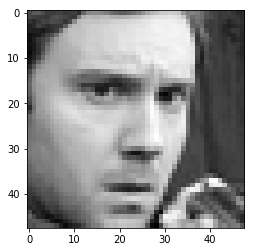

In [11]:
plt.imshow(X_train[0],cmap= "gray")

## Data Augmentation

In [ ]:
#Augmenting disgust category images
X_train_temp = np.zeros((436,X_train.shape[1], X_train.shape[2])).astype('float64')
y_train_temp = np.zeros((436)).astype('int')
count=0
j =0

for i in range(28709):
    
    if y_train[i] == 1:
        
        X_train_temp[j] = (X_train[i][:,::-1])
        y_train_temp[j] = int(1)
        j = j + 1

In [ ]:
X_train = np.concatenate([X_train,X_train_temp])
y_train = np.concatenate([y_train, y_train_temp])
X_train.shape

In [12]:
# Augmenting all images using horizontal flip
X_train = np.concatenate([X_train, X_train[:,:,::-1]])
y_train = np.concatenate([y_train, y_train])
X_train.shape

(57418, 48, 48)

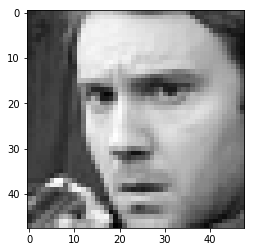

In [14]:
plt.imshow(X_train[28709],cmap= "gray")

## Data pre-processing

In [15]:
#Mean center the input data and normalize it
train_mean = X_train.mean(axis = 0)
train_std = X_train.std(axis = 0)
train_mean

array([[119.67034728, 116.68443694, 113.70514473, ..., 113.70514473,
        116.68443694, 119.67034728],
       [118.59261904, 115.53540702, 112.59167857, ..., 112.59167857,
        115.53540702, 118.59261904],
       [117.35887701, 114.34846215, 111.4762618 , ..., 111.4762618 ,
        114.34846215, 117.35887701],
       ...,
       [115.96053502, 115.03058274, 114.10517608, ..., 114.10517608,
        115.03058274, 115.96053502],
       [115.97152461, 115.02702985, 114.11242119, ..., 114.11242119,
        115.02702985, 115.97152461],
       [115.88237138, 114.94210875, 113.94897071, ..., 113.94897071,
        114.94210875, 115.88237138]])

In [16]:
# Perform same for train, test and validation data

X_train -= train_mean
X_train /= train_std

X_test -= train_mean
X_test /= train_std

X_val -= train_mean
X_val /= train_std

In [17]:
X_train[0]

array([[-0.60394612, -0.45329602, -0.39782714, ..., -0.77425861,
        -0.91049133, -0.95655967],
       [-0.65561081, -0.67793425, -0.69004841, ..., -0.71532876,
        -0.78981401, -0.91250863],
       [-0.82805569, -0.8920287 , -0.73233997, ..., -0.796048  ,
        -0.7294972 , -0.86493527],
       ...,
       [-0.31547286, -0.63693042, -0.92556704, ..., -0.54047664,
        -0.75150781, -0.92213843],
       [-0.49299182, -0.42064445, -0.45085393, ..., -0.1170062 ,
        -0.57348088, -0.88514344],
       [-0.49220248, -0.54745105, -0.38473321, ..., -0.1021148 ,
        -0.07575347, -0.42890869]])

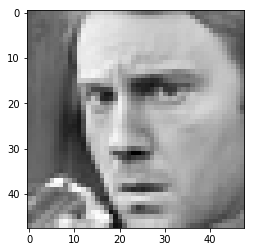

In [20]:
plt.imshow(X_train[28709],cmap= "gray")

## Save processed data

In [19]:
np.save("data files/X_train",X_train)
np.save("data files/y_train",y_train)

np.save("data files/X_test",X_test)
np.save("data files/y_test",y_test)

np.save("data files/X_val",X_val)
np.save("data files/y_val",y_val)